In [3]:
import pandas as pd

In [129]:
path = r'C:\\Users\\student\\Desktop\\dataset\\python\\tmdb-movie-metadata'

data = pd.read_csv(path+'\\tmdb_5000_movies.csv')

In [130]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [131]:
data = data[['id','genres', 'keywords','vote_average', 'vote_count','popularity','title','overview']]

In [132]:
m = data['vote_count'].quantile(0.9)
data = data[data['vote_count']>=m]

In [74]:
import ast
from ast import literal_eval

strdict = {'a':3, 'b':5}
print(type(strdict))
strdict2 = "{'a':3, 'b':5}"
print(type(strdict2))

ast.literal_eval(strdict2)


<class 'dict'>
<class 'str'>


{'a': 3, 'b': 5}

In [75]:
ps="""
{'lists':[1,2,3,4], 'tuples':(5,6,7)
}
"""
ps2 = ast.literal_eval(ps)
type(ps2)
print(ps2['lists'])

[1, 2, 3, 4]


In [76]:
data

,id,genres,keywords,vote_average,vote_count,popularity,title,overview
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",7.2,11800,150.437577,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",6.9,4500,139.082615,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",6.3,4466,107.376788,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",7.6,9106,112.312950,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",6.1,2124,43.926995,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...,...,...,...,...,...,...
4291,176,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...","[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",7.2,2184,63.655973,Saw,Obsessed with teaching his victims the value o...
4300,500,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...","[{""id"": 2052, ""name"": ""traitor""}, {""id"": 6099,...",8.0,3697,66.925866,Reservoir Dogs,A botched robbery indicates a police informant...
4302,429,"[{""id"": 37, ""name"": ""Western""}]","[{""id"": 801, ""name"": ""bounty hunter""}, {""id"": ...",8.1,2311,88.377076,"The Good, the Bad and the Ugly",While the Civil War rages between the Union an...
4337,103,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...","[{""id"": 422, ""name"": ""vietnam veteran""}, {""id""...",8.0,2535,58.845025,Taxi Driver,A mentally unstable Vietnam War veteran works ...


In [133]:
from ast import literal_eval
data.genres = data.genres.apply(literal_eval)
data.keywords = data.keywords.apply(literal_eval)

In [134]:
data.genres = data.genres.apply(lambda x : [d['name'] for d in x]).apply(lambda x : ' '.join(x))

In [135]:
data.keywords = data.keywords.apply(lambda x : [d['name'] for d in x]).apply(lambda x : ' '.join(x))

In [136]:
count_vec = CountVectorizer(ngram_range=(1,3))
count_vec_genres = count_vec.fit_transform(data.genres)

In [137]:
count_vec_genres.shape

(481, 364)

In [145]:
# 영화별 cos 유사도 측정
# 내림차순 sort
genres_cos_sim = cosine_similarity(count_vec_genres,count_vec_genres).argsort()[:,::-1]
genres_cos_sim

array([[  0,  13,  42, ..., 298, 297, 240],
       [ 11,   1, 200, ..., 329, 330, 240],
       [  2, 376, 216, ..., 314, 304, 240],
       ...,
       [478, 187,  12, ..., 326, 327,   0],
       [479, 466, 383, ..., 220, 224,   0],
       [480, 468, 294, ..., 246, 248,   0]], dtype=int64)

In [146]:
genres_cos_sim.shape

(481, 481)

In [153]:
def movie_recommendation(df,movie_title,top=30):
    target_movie_index = df[df['title']==movie_title].index.values
    sim_index = genres_cos_sim[target_movie_index, :top].reshape(-1)
    sim_index = sim_index[sim_index != target_movie_index]
    res = df.iloc[sim_index].sort_values('vote_count',ascending=False)[:10]
    return res
    
movie_recommendation(data, movie_title='The Dark Knight Rises')

,id,genres,keywords,vote_average,vote_count,popularity,title,overview
65,155,Drama Action Crime Thriller,dc comics crime fighter secret identity scarec...,8.2,12002,187.322927,The Dark Knight,Batman raises the stakes in his war on crime. ...
119,272,Action Crime Drama,himalaya martial arts dc comics crime fighter ...,7.5,7359,115.040024,Batman Begins,"Driven by tragedy, billionaire Bruce Wayne ded..."
828,24,Action Crime,japan coma martial arts kung fu underworld yak...,7.7,4949,79.754966,Kill Bill: Vol. 1,An assassin is shot at the altar by her ruthle...
1720,23483,Action Crime,crime fighter secret identity comic book super...,7.1,4645,45.054936,Kick-Ass,Dave Lizewski is an unnoticed high school stud...
2091,274,Crime Drama Thriller,based on novel psychopath horror suspense seri...,8.1,4443,18.174804,The Silence of the Lambs,"FBI trainee, Clarice Starling ventures into a ..."
2730,44214,Drama Thriller,dancing competition sex dancer obsession paran...,7.3,4430,91.285683,Black Swan,"A ballet dancer wins the lead in ""Swan Lake"" a..."
351,1422,Drama Thriller Crime,undercover boston police friends mafia underco...,7.9,4339,63.429157,The Departed,"To take down South Boston's Irish Mafia, the p..."
830,393,Action Crime Thriller,brother brother relationship swordplay katana ...,7.6,3948,50.622607,Kill Bill: Vol. 2,The Bride unwaveringly continues on her roarin...
99,9799,Action Crime Thriller,street gang car race undercover auto-tuning lo...,6.6,3428,6.909942,The Fast and the Furious,Domenic Toretto is a Los Angeles street racer ...
1102,68734,Drama Thriller,cia wife husband relationship document revolut...,7.1,3423,62.010560,Argo,As the Iranian revolution reaches a boiling po...


In [141]:
import numpy as np
x = np.array([[5,3,1,2]])
print(x.argsort())

print(x.argsort()[:,::-1])

[[2 3 1 0]]
[[0 1 3 2]]


In [83]:
#### 1) contents 기반 filtering
# str -> num 벡터화
from sklearn.feature_extraction.text import *
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
## bow : str vec -> num vec
# 1) DictVectorizer : 단어 갯수로 bow vector 생성
# 2) CountVectorizer : 단어 토큰화 후 토큰 갯수로 bow vector 생성
# 3) Tfidfvectorizer : CountVectorizer와 유사, tf-idf 방식으로 bow vector 생성
# 4) HashingVectorizer : 메모리 절약, 속도 빠름

In [90]:
# 1) DictVectorizer
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data = [{'a':1,"b":2},{'b':3,'c':1}]
print(dv.fit_transform(data))
print(dv.feature_names_)
print(dv.transform({'c':4,'d':3}))

[[1. 2. 0.]
 [0. 3. 1.]]
['a', 'b', 'c']
[[0. 0. 4.]]


In [103]:
# 2) CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['This is the first document','This is the second document',
                                      'This is the second document',
                                      'And the third one',
                                      'Is this the first document?',
                                     'The last document?']
cv = CountVectorizer()
cv.fit(corpus)
print(cv.vocabulary_)

print(cv.transform(['This is the second document']).toarray())
print(cv.transform(['This is the second document']).toarray())

{'this': 9, 'is': 3, 'the': 7, 'first': 2, 'document': 1, 'second': 6, 'and': 0, 'third': 8, 'one': 5, 'last': 4}
[[0 1 0 1 0 0 1 1 0 1]]
[[0 1 0 1 0 0 1 1 0 1]]


In [104]:
print(cv.transform(corpus).toarray())

[[0 1 1 1 0 0 0 1 0 1]
 [0 1 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 1]
 [1 0 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 0 1 0 1]
 [0 1 0 0 1 0 0 1 0 0]]


In [108]:
from sklearn.feature_extraction.text import CountVectorizer
cv2 = CountVectorizer(stop_words=['and','is','the','this']).fit(corpus)
cv2.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

In [110]:
cv3 = CountVectorizer(stop_words='english').fit(corpus)
cv3.vocabulary_

{'document': 0, 'second': 1}

In [112]:
cv4 = CountVectorizer(analyzer='char').fit(corpus)
cv4.vocabulary_

{'t': 15,
 'h': 7,
 'i': 8,
 's': 14,
 ' ': 0,
 'e': 5,
 'f': 6,
 'r': 13,
 'd': 4,
 'o': 12,
 'c': 3,
 'u': 16,
 'm': 10,
 'n': 11,
 'a': 2,
 '?': 1,
 'l': 9}

In [113]:
cv5 = CountVectorizer(token_pattern="t\w+").fit(corpus)
cv5.vocabulary_

{'this': 2, 'the': 0, 'third': 1}

In [114]:
import nltk
cv6 = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
cv6.vocabulary_

{'this': 10,
 'is': 4,
 'the': 8,
 'first': 3,
 'document': 2,
 'second': 7,
 'and': 1,
 'third': 9,
 'one': 6,
 '?': 0,
 'last': 5}

In [117]:
cv7 = CountVectorizer(ngram_range=(1,2)).fit(corpus)
cv7.vocabulary_

{'this': 20,
 'is': 5,
 'the': 13,
 'first': 3,
 'document': 2,
 'this is': 21,
 'is the': 6,
 'the first': 14,
 'first document': 4,
 'second': 11,
 'the second': 16,
 'second document': 12,
 'and': 0,
 'third': 18,
 'one': 10,
 'and the': 1,
 'the third': 17,
 'third one': 19,
 'is this': 7,
 'this the': 22,
 'last': 8,
 'the last': 15,
 'last document': 9}

In [118]:
cv8 = CountVectorizer(max_df=4,min_df=2).fit(corpus)
cv8.vocabulary_

{'this': 3, 'is': 1, 'first': 0, 'second': 2}

In [119]:
# 3) Tfidfvectorizer 
tfidf = TfidfVectorizer().fit(corpus)
tfidf.transform(corpus).toarray()

array([[0.        , 0.37811773, 0.60520354, 0.43784911, 0.        ,
        0.        , 0.        , 0.32761557, 0.        , 0.43784911],
       [0.        , 0.37811773, 0.        , 0.43784911, 0.        ,
        0.        , 0.60520354, 0.32761557, 0.        , 0.43784911],
       [0.        , 0.37811773, 0.        , 0.43784911, 0.        ,
        0.        , 0.60520354, 0.32761557, 0.        , 0.43784911],
       [0.55927514, 0.        , 0.        , 0.        , 0.        ,
        0.55927514, 0.        , 0.24826187, 0.55927514, 0.        ],
       [0.        , 0.37811773, 0.60520354, 0.43784911, 0.        ,
        0.        , 0.        , 0.32761557, 0.        , 0.43784911],
       [0.        , 0.42407356, 0.        , 0.        , 0.82774046,
        0.        , 0.        , 0.36743345, 0.        , 0.        ]])

In [121]:
# 4) HashingVectorizer 
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()
len(twenty.data)

11314

In [123]:
cv=CountVectorizer().fit(twenty.data)
cv.vocabulary_

{'from': 56979,
 'lerxst': 75358,
 'wam': 123162,
 'umd': 118280,
 'edu': 50527,
 'where': 124031,
 'my': 85354,
 'thing': 114688,
 'subject': 111322,
 'what': 123984,
 'car': 37780,
 'is': 68532,
 'this': 114731,
 'nntp': 87620,
 'posting': 95162,
 'host': 64095,
 'rac3': 98949,
 'organization': 90379,
 'university': 118983,
 'of': 89362,
 'maryland': 79666,
 'college': 40998,
 'park': 92081,
 'lines': 76032,
 '15': 4605,
 'was': 123292,
 'wondering': 124931,
 'if': 65798,
 'anyone': 28615,
 'out': 90774,
 'there': 114579,
 'could': 42876,
 'enlighten': 51793,
 'me': 80638,
 'on': 89860,
 'saw': 104813,
 'the': 114455,
 'other': 90686,
 'day': 45295,
 'it': 68766,
 'door': 48618,
 'sports': 109581,
 'looked': 76718,
 'to': 115475,
 'be': 32311,
 'late': 74693,
 '60s': 16574,
 'early': 50111,
 '70s': 18299,
 'called': 37433,
 'bricklin': 34995,
 'doors': 48620,
 'were': 123796,
 'really': 99822,
 'small': 108252,
 'in': 66608,
 'addition': 26073,
 'front': 56989,
 'bumper': 35612,
 'se

In [124]:
len(cv.vocabulary_)

130107

In [127]:
#print(cv.transform(twenty.data))
%time cv.transform(twenty.data)

Wall time: 3.16 s


<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [152]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=300000)
# %time hv.transform(twenty.data)
hv.transform(twenty.data)

<11314x300000 sparse matrix of type '<class 'numpy.float64'>'
	with 1786336 stored elements in Compressed Sparse Row format>

In [ ]:
#### items기반 협업 filtering

In [237]:
path = r'C:\\Users\\student\\Desktop\\dataset\\python\\the-movies-dataset'

data = pd.read_csv(path+'\\ratings_small.csv')

In [238]:
# user - item table 구성
data = data.pivot_table('rating',index='userId',columns='movieId')

In [239]:
ratings = pd.read_csv(path+'\\ratings_small.csv')


path = r'C:\\Users\\student\\Desktop\\dataset\\python\\tmdb-movie-metadata'
movies = pd.read_csv(path+'\\tmdb_5000_movies.csv')

In [166]:
movies.rename(columns={'id':'movieId'},inplace=True)

In [168]:
ratings_movies = pd.merge(ratings, movies, on='movieId')
ratings_movies.shape

(18571, 23)

In [172]:
# 사용자별 영화 평점
data = ratings_movies.pivot_table('rating',index='userId',columns='title').fillna(0)

In [174]:
# 영화별 사용자 평점
data = data.T
data

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15 Minutes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Blocks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"You, Me and Dupree",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Young Frankenstein,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
Zodiac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
### 영화별 cos유사도 기반 10개 영화 추천
movie_sim = cosine_similarity(data,data)
movie_sim_df = pd.DataFrame(data=movie_sim, index=data.index, columns=data.index)
movie_sim_df['Romeo Must Die'].sort_values(ascending=False)[1:10]

title
X-Men Origins: Wolverine              0.649625
The Wedding Planner                   0.633776
Conquest of the Planet of the Apes    0.501164
Dogtown and Z-Boys                    0.488048
The Terminal                          0.462727
The Last Samurai                      0.440224
An Unfinished Life                    0.427057
Madagascar                            0.422282
The Beach                             0.410215
Name: Romeo Must Die, dtype: float64

In [ ]:
### 행렬분해 기반

In [251]:
path = r'C:\\Users\\student\\Desktop\\dataset\\python\\movielens-small'

rating = pd.read_csv(path+'\\ratings.csv')
movie = pd.read_csv(path+'\\movies.csv')

In [252]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds
import warnings
warnings.filterwarnings('ignore')

In [253]:
rating.drop('timestamp',axis=1,inplace=True)

In [254]:
movie.drop('genres',axis=1,inplace=True)

In [255]:
user_movie = pd.merge(rating, movie, on='movieId')

In [256]:
user_movie_rating = user_movie.pivot_table('rating',index='userId',columns='title').fillna(0)

In [257]:
movie_user_rating = user_movie_rating.T

In [258]:
movie_user_rating.shape

(9064, 671)

In [259]:
### Truncated SVD 
# (9064,671) -> (9064,12)
svd_mat = TruncatedSVD(n_components=12).fit_transform(movie_user_rating)
svd_mat.shape

(9064, 12)

In [261]:
# pearson 상관계수
corr = np.corrcoef(svd_mat)

corr2 = corr[:200,:200]

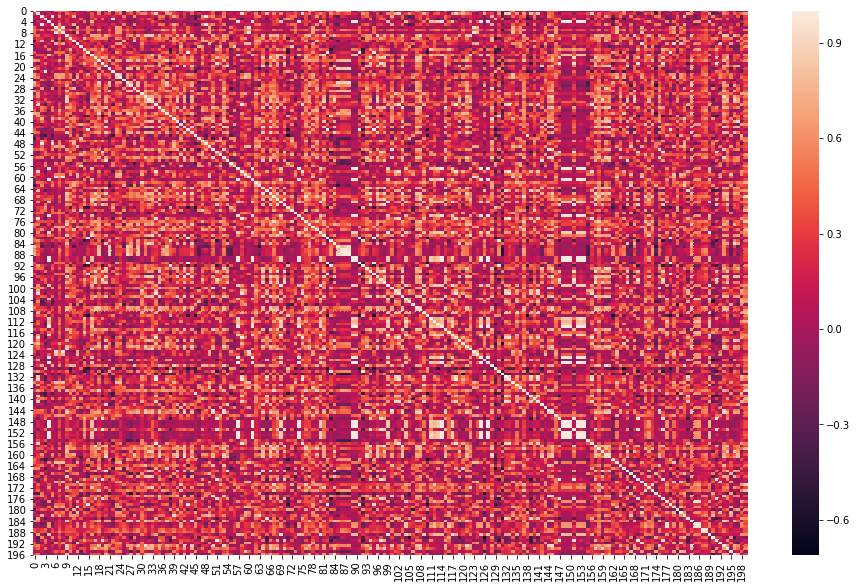

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(corr2)

In [263]:
movie_title = user_movie_rating.columns
movie_title_list = list(movie_title)
movie_title_list

['"Great Performances" Cats (1998)',
 '$9.99 (2008)',
 "'Hellboy': The Seeds of Creation (2004)",
 "'Neath the Arizona Skies (1934)",
 "'Round Midnight (1986)",
 "'Salem's Lot (2004)",
 "'Til There Was You (1997)",
 "'burbs, The (1989)",
 "'night Mother (1986)",
 '(500) Days of Summer (2009)',
 '*batteries not included (1987)',
 '...And God Spoke (1993)',
 '...And Justice for All (1979)',
 '1-900 (06) (1994)',
 '10 (1979)',
 '10 Attitudes (2001)',
 '10 Cloverfield Lane (2016)',
 '10 Items or Less (2006)',
 '10 Things I Hate About You (1999)',
 '10 Years (2011)',
 '10,000 BC (2008)',
 '100 Girls (2000)',
 '100 Rifles (1969)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '101 Reykjavik (101 Reykjavík) (2000)',
 '102 Dalmatians (2000)',
 '10th Kingdom, The (2000)',
 '11\'09"01 - September 11 (2002)',
 '11:14 (2003)',
 '12 Angry Men (1957)',
 '12 Angry Men (1997)',
 '12 Years a Slave (2013)',
 '127 Hours (2010)',
 '12:08 East of Bucharest (A fost sa

In [265]:
gog = movie_title_list.index('Guardians of the Galaxy (2014)')
list(movie_title[corr[gog]>=0.9])[:10]


['10,000 BC (2008)',
 '2 Guns (2013)',
 '2012 (2009)',
 '21 (2008)',
 '300: Rise of an Empire (2014)',
 'Abduction (2011)',
 'Adjustment Bureau, The (2011)',
 'Adventures of Tintin, The (2011)',
 'Alice in Wonderland (2010)',
 'Amazing Spider-Man, The (2012)']